# Injury Analysis:

- Identify the unique injuries present in the dataset for self assessment and the diagnostic of the professional medical reviewer.
- Provide a description of the injuries.
- Analyse the relationship between self-assessment and the diagnostic of the medical reviewer.
- Decide if self assessment adds information.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from core.constants import RICKD_RESULTS_FOLDER, RICKD_SESSION_DATA_FULL_FILE

run_data_full = pd.read_csv(RICKD_SESSION_DATA_FULL_FILE)
run_injury_data = run_data_full[['id', 'sub_id','InjDefn', 'SpecInjury', 'SpecInjury2', 'InjJoint', 'InjJoint2', 'InjSide', 'InjSide2']]
run_injury_data

,id,sub_id,InjDefn,SpecInjury,SpecInjury2,InjJoint,InjJoint2,InjSide,InjSide2
0,100433_20101005t132240,100433,training volume/intensity affected,pain,NaN,knee,no injury,right,right
1,100434_20101117t132240,100434,training volume/intensity affected,disc degeneration,NaN,lumbar spine,no injury,bilateral,right
2,100537_20120703t102550,100537,2 workouts missed in a row,other,NaN,hip/pelvis,no injury,right,right
3,100560_20120717t103748,100560,no injury,NaN,NaN,no injury,no injury,right,right
4,101481_20120717t105021,101481,no injury,NaN,NaN,"no injury,no injury",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1827,200986_20150312t143944,200986,no injury,NaN,NaN,NaN,NaN,NaN,NaN
1828,200987_20150312t160840,200987,continuing to train in pain,pelvic malalignment,itb syndrome,hip/pelvis,thigh,right,left
1829,201100_20150409t155915,201100,training volume/intensity affected,muscle strain,ligament sprain,lumbar spine,ankle,bilateral,right
1830,201101_20150413t143152,201101,no injury,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
print(f"Num of NaN in SpecInjury: {run_injury_data[run_injury_data.SpecInjury.isna()].sub_id.count()}")
print(f"Num of no injury in SpecInjury: {run_injury_data[run_injury_data.SpecInjury == 'no injury'].sub_id.count()}")

Num of NaN in SpecInjury: 588
Num of no injury in SpecInjury: 70


In [33]:
display(run_injury_data['InjJoint'].value_counts(dropna=False).sort_index(ascending=True))
display(run_injury_data['InjJoint2'].value_counts(dropna=False).sort_index(ascending=True))
display(run_injury_data['InjSide'].value_counts(dropna=False).sort_index(ascending=True))
display(run_injury_data['InjSide2'].value_counts(dropna=False).sort_index(ascending=True))

InjJoint
ankle                  107
foot                   141
hip/pelvis             136
knee                   348
lower leg              185
lumbar spine            41
no injury              228
no injury,no injury    189
other                   20
sacroiliac joint        22
thigh                  181
NaN                    234
Name: count, dtype: int64

InjJoint2
ankle                40
foot                 51
hip/pelvis           59
knee                 67
lower leg            38
lumbar spine         23
no injury           514
other                 3
sacroiliac joint     10
thigh                31
NaN                 996
Name: count, dtype: int64

InjSide
bi-lateral      3
bilateral     305
left          406
right         632
NaN           486
Name: count, dtype: int64

InjSide2
bilateral     100
left          100
right         622
NaN          1010
Name: count, dtype: int64

## Clean Injury type:
Clean injury type introducing codes that are easier to handle. Remove duplciates and add descriptions.

In [34]:
# Combine SpecInjury and SpecInjury2 columns and get unique values
unique_combined_injuries = pd.concat([run_injury_data['SpecInjury'], run_injury_data['SpecInjury2']]).dropna().drop_duplicates()

print("### Distinct Injury Types")
for injury in sorted(unique_combined_injuries):
    print(f"- {injury}")


### Distinct Injury Types
- achilles tendonitis
- bursitis
- calf muscle strain
- chondromalacia
- compartment syndrome
- cyst
- deformity (e.g hammer/claw toes, bunion)
- deformity(ie hammer/claw toes, bunion)
- disc degeneration
- disc protrusion
- dislocation
- fibula fracture
- fibula stress fracture
- fill in specifics below
- first ray tendonitis (turf toe)
- gastrocnemius strain
- groin muscle strain
- hamstring muscle strain
- high ankle sprain with tendonosis
- hip flexor strain
- hip joint irritation
- ischial bursitis
- itb syndrome
- labral tear
- ligament sprain
- ligament tear/rupture acl
- ligament tear/rupture mcl
- ligament tear/rupture pcl
- ligament tear/rupture-acl
- low back pain
- medial tibial stress syndrome
- meniscal tear medial
- meniscal tear-lateral
- meniscal tear-medial
- metarsalgia
- metatarsal stress fracture
- muscle spasm
- muscle strain
- mva, not running related
- nerve impingement
- no injury
- non-specific injury
- osteitis pubis
- osteoarthritis

In [35]:

from core.data_quality import map_injury_codes
from core.constants import RICKD_MAP_INJURY_CODE, RICKD_MAP_INJURY_DESC, RICKD_MAP_SELF_INJURY_CODE, RICKD_MAP_INJURED_JOINT, RICKD_MAP_INJURED_JOINT_SIDE
from core.utils import save_df_as_table_image


df = run_injury_data.copy()
df = map_injury_codes(df, RICKD_MAP_SELF_INJURY_CODE, "InjDefn", "injury_severity_code", map_key_col="key", map_value_col="value")
df = map_injury_codes(df, RICKD_MAP_SELF_INJURY_CODE, "InjDefn", "injury_severity_value", map_key_col="key", map_value_col="num_value")
df = map_injury_codes(df, RICKD_MAP_INJURED_JOINT, "InjJoint", "injured_joint_code", map_key_col="orig_value", map_value_col="code")
df = map_injury_codes(df, RICKD_MAP_INJURED_JOINT, "InjJoint2", "injured_joint2_code", map_key_col="orig_value", map_value_col="code")
df = map_injury_codes(df, RICKD_MAP_INJURED_JOINT_SIDE, "InjSide", "injured_side_code", map_key_col="orig_value", map_value_col="code")
df = map_injury_codes(df, RICKD_MAP_INJURED_JOINT_SIDE, "InjSide2", "injured_side2_code", map_key_col="orig_value", map_value_col="code")
df = map_injury_codes(df, RICKD_MAP_INJURY_CODE, "SpecInjury", "injury_code", map_key_col="orig_value", map_value_col="code")
df = map_injury_codes(df, RICKD_MAP_INJURY_CODE, "SpecInjury2", "injury2_code", map_key_col="orig_value", map_value_col="code")
df = map_injury_codes(df, RICKD_MAP_INJURY_DESC, "injury_code", "injury_desc", map_key_col="code", map_value_col="desc")
df = map_injury_codes(df, RICKD_MAP_INJURY_DESC, "injury_code", "injury_name", map_key_col="code", map_value_col="name")
df = map_injury_codes(df, RICKD_MAP_INJURY_DESC, "injury2_code", "injury2_desc", map_key_col="code", map_value_col="desc")
df = map_injury_codes(df, RICKD_MAP_INJURY_DESC, "injury2_code", "injury2_name", map_key_col="code", map_value_col="name")

clean_injury_data = df.copy()
clean_injury_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1832 non-null   object 
 1   sub_id                 1832 non-null   int64  
 2   InjDefn                1752 non-null   object 
 3   SpecInjury             1244 non-null   object 
 4   SpecInjury2            269 non-null    object 
 5   InjJoint               1598 non-null   object 
 6   InjJoint2              836 non-null    object 
 7   InjSide                1346 non-null   object 
 8   InjSide2               822 non-null    object 
 9   injury_severity_code   1752 non-null   object 
 10  injury_severity_value  1752 non-null   float64
 11  injured_joint_code     1832 non-null   object 
 12  injured_joint2_code    1832 non-null   object 
 13  injured_side_code      1832 non-null   object 
 14  injured_side2_code     1832 non-null   object 
 15  inju

In [36]:
# There are two situations where the injury2_code reports an injury but the injury_code is no_injury.
# Here we should flip injury2_code and injury_code, also injured_joint2_code, injured_joint_code, injured_side2_code, injured_side_code, injury2_desc, injury_desc, injury2_name, injury_name

# Find rows where injury_code is "no_injury" and injury2_code is not "no_injury"
mask = (clean_injury_data.injury_code == "no_injury") & (clean_injury_data.injury2_code != "no_injury")

# Columns to flip
cols_to_flip = [
    "injury_code", "injury2_code",
    "injured_joint_code", "injured_joint2_code",
    "injured_side_code", "injured_side2_code",
    "injury_desc", "injury2_desc",
    "injury_name", "injury2_name"
]
print("Before")
display(clean_injury_data[["id", *cols_to_flip]][mask])
original_ids = clean_injury_data.index[mask]

# Actually swap the values between the columns for the selected rows
for col1, col2 in zip(cols_to_flip[::2], cols_to_flip[1::2]):
    temp = clean_injury_data.loc[mask, col1].copy()
    clean_injury_data.loc[mask, col1] = clean_injury_data.loc[mask, col2]
    clean_injury_data.loc[mask, col2] = temp

print("After")
display(clean_injury_data[["id", *cols_to_flip]].loc[original_ids])

Before


,id,injury_code,injury2_code,injured_joint_code,injured_joint2_code,injured_side_code,injured_side2_code,injury_desc,injury2_desc,injury_name,injury2_name
9,100671_20121213t105755,no_injury,pain,other,lumbar_spine,right,left,No injury has been diagnosed.,General sensation of discomfort without speci...,no injury,pain
924,100713_20130404t101951,no_injury,burs,other,hip_pelvis,right,right,No injury has been diagnosed.,Inflammation of joint cushioning sacs due to r...,no injury,bursitis


After


,id,injury_code,injury2_code,injured_joint_code,injured_joint2_code,injured_side_code,injured_side2_code,injury_desc,injury2_desc,injury_name,injury2_name
9,100671_20121213t105755,pain,no_injury,lumbar_spine,other,left,right,General sensation of discomfort without speci...,No injury has been diagnosed.,pain,no injury
924,100713_20130404t101951,burs,no_injury,hip_pelvis,other,right,right,Inflammation of joint cushioning sacs due to r...,No injury has been diagnosed.,bursitis,no injury


In [37]:
# Create a new dataframe with all columns from run_data_full plus the new mapped columns from df
run_data_full_with_injury_codes = pd.concat([
    run_data_full,
    clean_injury_data[
        ['injury_severity_code', 'injury_severity_value', 'injury_code',
         'injury2_code', 'injury_desc', 'injury2_desc', 'injury_name', 'injury2_name',
         'injured_joint_code', 'injured_joint2_code', 'injured_side_code', 'injured_side2_code'
         ]
    ]
], axis=1)

run_data_full_with_injury_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Columns: 193 entries, id to injured_side2_code
dtypes: float64(87), int64(79), object(27)
memory usage: 2.7+ MB


## Analyse Injury data:
- Describe types of injuries.
- Relationship between self-assessment and the diagnostic of the medical reviewer.

In [38]:
# Get unique values and their counts from InjDefn column
injury_defn_counts = clean_injury_data['InjDefn'].value_counts(dropna=False)
injury_defn_counts


InjDefn
no injury                             659
training volume/intensity affected    499
continuing to train in pain           320
2 workouts missed in a row            274
NaN                                    80
Name: count, dtype: int64

In [39]:
clean_injury_data['injury2_code'].value_counts(dropna=False).sort_index(ascending=True)

injury2_code
achi_tend                13
burs                      9
calf_musc_stra            7
comp_synd                 1
disc_dege                 4
disc_prot                 2
groin_musc_stra           3
hams_musc_stra           15
hip_flex_stra             1
hip_joint_irri            1
itb_synd                 14
liga_spra                 5
liga_tear_acl             2
liga_tear_mcl             3
low_back_pain             7
medi_tibi_stre_synd       3
meni_tear_med             9
musc_spasm                3
no_injury              1566
oste_pubis                1
osteoar                   3
pain                     95
pate_pain_synd           14
pate_tend                 4
pelv_dysf_gene            1
pero_tend                 6
plan_fasc                22
scia_nerve_impi           1
shin_spli                 7
si_joint_pain             3
strain                    3
tend                      1
tibia_stre_frac           3
Name: count, dtype: int64

In [40]:
# Combine SpecInjury/injury_code and SpecInjury2/injury2_code into a single dataframe
medical_reviewer_injury = pd.concat([
    clean_injury_data[['injury_code']].rename(columns={'injury_code': 'Code'}),
    clean_injury_data[clean_injury_data['injury2_code'] != 'healthy'][['injury2_code']].rename(columns={'injury2_code': 'Code'})
])

medical_reviewer_injury_counts = medical_reviewer_injury.value_counts().sort_values(ascending=False)

with pd.option_context('display.max_rows', None):
    display(medical_reviewer_injury_counts)



Code                     
no_injury                    2231
pain                          513
pate_pain_synd                148
itb_synd                      140
achi_tend                      75
plan_fasc                      72
calf_musc_stra                 63
hams_musc_stra                 46
shin_spli                      43
burs                           33
medi_tibi_stre_synd            33
pero_tend                      18
pate_tend                      18
tibia_stre_frac                18
osteoar                        17
low_back_pain                  16
tend                           16
meni_tear_med                  14
si_joint_pain                  10
liga_tear_acl                  10
oste_pubis                      9
liga_spra                       9
hip_flex_stra                   8
disc_dege                       8
disc_prot                       8
musc_spasm                      8
chon                            7
pelv_dysf_gene                  7
comp_synd             

In [41]:
df = pd.read_csv(RICKD_MAP_INJURY_CODE).sort_values(by='code')
save_df_as_table_image(
    df,
    os.path.join(RICKD_RESULTS_FOLDER, 'injury_code_mapping.png')
)
display(df)


,orig_value,code
0,achilles tendonitis,achi_tend
1,bursitis,burs
2,calf muscle strain,calf_musc_stra
3,chondromalacia,chon
4,compartment syndrome,comp_synd
...,...,...
65,stress reaction,stre_reac
66,synovitis,syno
67,tendonitis,tend
68,tibia fracture,tibia_frac


In [42]:
df = medical_reviewer_injury_counts.reset_index()
save_df_as_table_image(
    df,
    os.path.join(RICKD_RESULTS_FOLDER, 'medical_reviewer_injury_counts_sorted.png')
)
display(df)


,Code,count
0,no_injury,2231
1,pain,513
2,pate_pain_synd,148
3,itb_synd,140
4,achi_tend,75
5,plan_fasc,72
6,calf_musc_stra,63
7,hams_musc_stra,46
8,shin_spli,43
9,burs,33


In [43]:
N=20
df = medical_reviewer_injury_counts.reset_index().sort_values(by='count', ascending=False).head(20)
save_df_as_table_image(
    df,
    os.path.join(RICKD_RESULTS_FOLDER, f'medical_reviewer_injury_counts_top{N}.png')
)
display(df)

,Code,count
0,no_injury,2231
1,pain,513
2,pate_pain_synd,148
3,itb_synd,140
4,achi_tend,75
5,plan_fasc,72
6,calf_musc_stra,63
7,hams_musc_stra,46
8,shin_spli,43
9,burs,33


In [44]:
subject_pace = run_data_full_with_injury_codes.groupby('sub_id')['speed_r'].mean().reset_index()

# Get most common injury per subject
subject_injuries = pd.concat([
    run_data_full_with_injury_codes[['sub_id', 'injury_code']].rename(columns={'injury_code': 'Code'}),
    run_data_full_with_injury_codes[run_data_full_with_injury_codes['injury2_code'] != 'healthy'][['sub_id', 'injury2_code']].rename(columns={'injury2_code': 'Code'})
])

most_common_injury = subject_injuries.groupby('sub_id')['Code'].agg(
    lambda x: x.value_counts().index[0] if len(x) > 0 else 'healthy'
).reset_index()

subject_summary = pd.merge(subject_pace, most_common_injury, on='sub_id').rename(columns={'speed_r': 'pace (m/s)', 'Code': 'Injury Code'})

injury_pace_summary = subject_summary.groupby('Injury Code')['pace (m/s)'].agg(['mean', 'count']).reset_index()
injury_pace_summary = injury_pace_summary.sort_values('mean', ascending=False).rename(columns={'mean': 'mean pace (m/s)'})

display(injury_pace_summary)

save_df_as_table_image(
    injury_pace_summary,
    os.path.join(RICKD_RESULTS_FOLDER, 'injury_pace_summary.png')
)


,Injury Code,mean pace (m/s),count
49,stre_frac,3.290489,1
33,oste_pubis,3.044357,4
40,pelv_mala,3.001225,2
54,tibia_stre_frac,2.966210,7
25,meni_tear_lat,2.925006,1
50,stre_reac,2.914865,1
39,pelv_dysf_gene,2.840566,3
38,pate_tend,2.836377,9
13,groin_musc_stra,2.779100,2
48,strain,2.750950,1


In [45]:
run_data_full_with_injury_codes['datestring'] = pd.to_datetime(run_data_full_with_injury_codes['datestring'])

# Get all dates for each subject
subject_dates = run_data_full_with_injury_codes.groupby('sub_id')['datestring'].apply(list).reset_index()

def is_longitudinal(dates):
    if len(dates) < 2:
        return False
    dates = sorted(dates)
    for i in range(len(dates)-1):
        if (dates[i+1] - dates[i]).days < 30:
            return False
    return True

# Apply the check to each subject
subject_dates['is_longitudinal'] = subject_dates['datestring'].apply(is_longitudinal)
longitudinal_subjects = subject_dates[subject_dates['is_longitudinal']]

print(f"Number of subjects with longitudinal data (all sessions >= 1 month apart): {len(longitudinal_subjects)}")
print(f"Total number of subjects: {len(subject_dates)}")
print(f"Percentage of subjects with longitudinal data: {len(longitudinal_subjects)/len(subject_dates)*100:.1f}%")

# # Calculate and display time differences between consecutive sessions
# all_diffs = []
# for dates in subject_dates['datestring']:
#     dates = sorted(dates)
#     for i in range(len(dates)-1):
#         all_diffs.append((dates[i+1] - dates[i]).days / 30)

# print("\nSummary statistics of time differences between consecutive sessions (months):")
# print(pd.Series(all_diffs).describe())

Number of subjects with longitudinal data (all sessions >= 1 month apart): 30
Total number of subjects: 1403
Percentage of subjects with longitudinal data: 2.1%


In [46]:
for col in run_data_full_with_injury_codes.columns:
    print(col)
    # display(run_data_full_with_injury_codes[col].value_counts())
    try:
        print(f"Max value: {run_data_full_with_injury_codes[col].max()}")
        print(f"Min value: {run_data_full_with_injury_codes[col].min()}")
        if run_data_full_with_injury_codes[col].dtype != 'object':
            print(f"Mean value: {run_data_full_with_injury_codes[col].mean()}")
            print(f"Median value: {run_data_full_with_injury_codes[col].median()}")
    except:
        pass
    

id
Max value: 300375_20140502t074159
Min value: 100001_20110531t161051
sub_id
Max value: 300375
Min value: 100001
Mean value: 122830.82914847162
Median value: 101256.0
datestring
Max value: 2017-06-29 12:56:14
Min value: 2010-01-12 13:38:43
Mean value: 2014-01-11 22:43:59.705817856
Median value: 2014-06-18 01:13:49.500000
filename
Max value: 20170629t125614.json
Min value: 20090527t000000.json
speed_r
Max value: 4.8769979791919
Min value: 1.17204781550085
Mean value: 2.760160124962194
Median value: 2.72130971833423
age
Max value: 255
Min value: 18
Mean value: 38.169213973799124
Median value: 37.0
Height
Max value: 999.0
Min value: 0.0
Mean value: 173.05191908146526
Median value: 172.7
Weight
Max value: 1564.0
Min value: 0.0
Mean value: 71.01722255340289
Median value: 69.1
Gender
Max value: unknown
Min value: female
DominantLeg
InjDefn
InjJoint
InjSide
SpecInjury
InjDuration
Max value: 30000.0
Min value: 0.0
Mean value: 450.4716049382716
Median value: 120.0
InjJoint2
InjSide2
SpecInjury

In [47]:
# Remove columns that have 0 in all values
zero_columns = []
for col in run_data_full_with_injury_codes.columns:
    if pd.api.types.is_numeric_dtype(run_data_full_with_injury_codes[col]):
        if (run_data_full_with_injury_codes[col] == 0).all():
            zero_columns.append(col)

cleaned_session_data_full_part1 = run_data_full_with_injury_codes.drop(columns=zero_columns)

In [48]:
columns = ['has_no_injury', 
    'injury_severity_value','InjDefn',
    'injury_code','SpecInjury',
    'injury2_code', 'SpecInjury2',
    'injured_joint_code','InjJoint', 
    'injured_joint2_code', 'InjJoint2'
]
# display(cleaned_session_data_full_part1[columns][cleaned_session_data_full_part1.injury_severity_value == 0].head(10))
display(cleaned_session_data_full_part1[["InjDefn", "InjJoint", "SpecInjury", "SpecInjury2"]][
    (cleaned_session_data_full_part1.injury_code == "no_injury") & (cleaned_session_data_full_part1.injury_severity_value > 0)
].value_counts(dropna=False).sort_index(ascending=False))

InjDefn                             InjJoint   SpecInjury               SpecInjury2
training volume/intensity affected  other      NaN                      NaN            4
                                               fill in specifics below  NaN            4
                                    no injury  NaN                      NaN            1
continuing to train in pain         other      NaN                      NaN            2
                                               fill in specifics below  NaN            3
                                    no injury  NaN                      NaN            1
2 workouts missed in a row          other      NaN                      NaN            1
                                    no injury  NaN                      NaN            1
Name: count, dtype: int64

In [49]:
def classify_injury_status(df: pd.DataFrame):
    """
    Classify all subjects in a DataFrame as injured or uninjured.
    
    Args:
        df: DataFrame
            DataFrame containing at least the following columns:
            - injury_code (cleaned version of SpecInjury)
    
    Returns:
        Series: True for UNINJURED, False for INJURED
    """
    # # Check InjDefn condition
    # inj_defn_ok = df['injury_severity_value'] == 0
    
    # # Check InjJoint condition
    # inj_joint_ok = (
    #     (df['injured_joint_code'] == 'no_injury') |
    #     df['InjJoint'].isna() |
    #     df['InjJoint'].isnull()
    # )

    # inj_joint2_ok = (
    #     (df['injured_joint2_code'] == 'no_injury') |
    #     df['InjJoint2'].isna() |
    #     df['InjJoint2'].isnull()

    # )
    
    # Check SpecInjury condition
    spec_injury_ok = (
        (df['injury_code'] == 'no_injury') |
        df['injury_code'].isna() |
        df['injury_code'].isnull()
    )

    # # Check SpecInjury2 condition
    # spec_injury2_ok = (
    #     (df['injury2_code'] == 'no_injury') |
    #     df['injury2_code'].isna() |
    #     df['injury2_code'].isnull()
    # )
    
    return spec_injury_ok

cleaned_session_data_full_part1["has_no_injury"] = classify_injury_status(cleaned_session_data_full_part1)

In [50]:
print(f"Number of healthy sessions: {len(cleaned_session_data_full_part1[cleaned_session_data_full_part1.has_no_injury])}")
df = cleaned_session_data_full_part1[
    ['has_no_injury', 
    'injury_severity_value','InjDefn',
    'injury_code','SpecInjury',
    'injury2_code', 'SpecInjury2',
    'injured_joint_code','InjJoint', 
    'injured_joint2_code', 'InjJoint2'
    ]].value_counts(dropna=False).sort_index(ascending=False)
with pd.option_context('display.max_rows', None):
    display(df)

save_df_as_table_image(
    df[df.index.get_level_values('has_no_injury') == True].reset_index(),
    os.path.join(RICKD_RESULTS_FOLDER, 'no_injury_session_counts.png')
)


Number of healthy sessions: 665


has_no_injury  injury_severity_value  InjDefn                             injury_code                SpecInjury                                injury2_code         SpecInjury2                    injured_joint_code  InjJoint             injured_joint2_code  InjJoint2       
True           NaN                    NaN                                 no_injury                  no injury                                 no_injury            NaN                            no_injury           NaN                  no_injury            NaN                  70
               3.0                    2 workouts missed in a row          no_injury                  NaN                                       no_injury            NaN                            other               other                no_injury            NaN                   1
                                                                                                                                                                    

In [51]:
df = cleaned_session_data_full_part1[
    ['has_no_injury', 
    'injury_severity_value','InjDefn',
    'injury_code','SpecInjury',
    'injury2_code', 'SpecInjury2',
    'injured_joint_code','InjJoint', 
    'injured_joint2_code', 'InjJoint2'
    ]][
        (cleaned_session_data_full_part1.has_no_injury == True) & 
        (
            (cleaned_session_data_full_part1.injured_joint_code != "no_injury") |
            (cleaned_session_data_full_part1.injured_joint2_code != "no_injury") |
            (cleaned_session_data_full_part1.injury_severity_value > 0)
        )
    ].value_counts(dropna=False).sort_index(ascending=False)

with pd.option_context('display.max_rows', None):
    display(df)

save_df_as_table_image(
    df.sort_values().head(20).reset_index(),
    os.path.join(RICKD_RESULTS_FOLDER, 'potentially_wrongly_mapped_uninjured_data.png')
)


has_no_injury  injury_severity_value  InjDefn                             injury_code  SpecInjury               injury2_code  SpecInjury2  injured_joint_code  InjJoint   injured_joint2_code  InjJoint2
True           3.0                    2 workouts missed in a row          no_injury    NaN                      no_injury     NaN          other               other      no_injury            NaN          1
                                                                                                                                           no_injury           no injury  no_injury            no injury    1
               2.0                    training volume/intensity affected  no_injury    NaN                      no_injury     NaN          other               other      other                other        1
                                                                                                                                                                          no_injury  

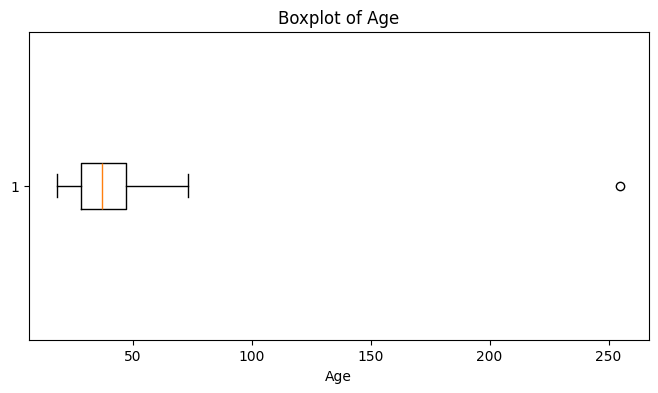

NewMax Age: 73.0, Min Age: 18.0


In [52]:
# Age of 255 is clearly an outlier, replace with Nan.
cleaned_session_data_full_part2 = cleaned_session_data_full_part1.copy()
plt.figure(figsize=(8, 4))
plt.boxplot(cleaned_session_data_full_part2['age'].dropna(), vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

# Replace outliers in 'age' with NaN
outlier_mask = cleaned_session_data_full_part2['age'] > 100
cleaned_session_data_full_part2.loc[outlier_mask, 'age'] = np.nan
print(f"NewMax Age: {cleaned_session_data_full_part2['age'].max()}, Min Age: {cleaned_session_data_full_part2['age'].min()}")

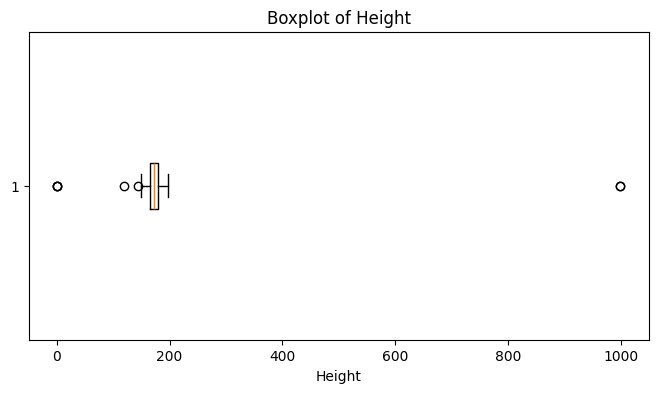

New Max Height: 196.5, Min Height: 120.0


In [53]:
# Height of 999 is clearly an outlier, replace with Nan.

plt.figure(figsize=(8, 4))
plt.boxplot(cleaned_session_data_full_part2['Height'].dropna(), vert=False)
plt.title('Boxplot of Height')
plt.xlabel('Height')
plt.show()

outlier_mask = (cleaned_session_data_full_part2['Height'] > 300) | (cleaned_session_data_full_part2['Height'] < 50)
cleaned_session_data_full_part2.loc[outlier_mask, 'Height'] = np.nan
print(f"New Max Height: {cleaned_session_data_full_part2['Height'].max()}, Min Height: {cleaned_session_data_full_part2['Height'].min()}")

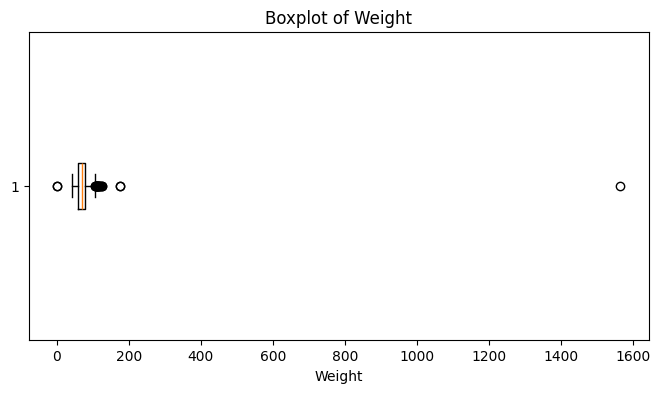

New Max Weight: 176.0, Min Weight: 42.5


In [54]:
# Weight of 1564 is clearly an outlier, replace with Nan.

plt.figure(figsize=(8, 4))
plt.boxplot(cleaned_session_data_full_part2['Weight'].dropna(), vert=False)
plt.title('Boxplot of Weight')
plt.xlabel('Weight')
plt.show()

outlier_mask = (cleaned_session_data_full_part2['Weight'] < 25) | (cleaned_session_data_full_part2['Weight'] > 300)
cleaned_session_data_full_part2.loc[outlier_mask, 'Weight'] = np.nan
print(f"New Max Weight: {cleaned_session_data_full_part2['Weight'].max()}, Min Weight: {cleaned_session_data_full_part2['Weight'].min()}")

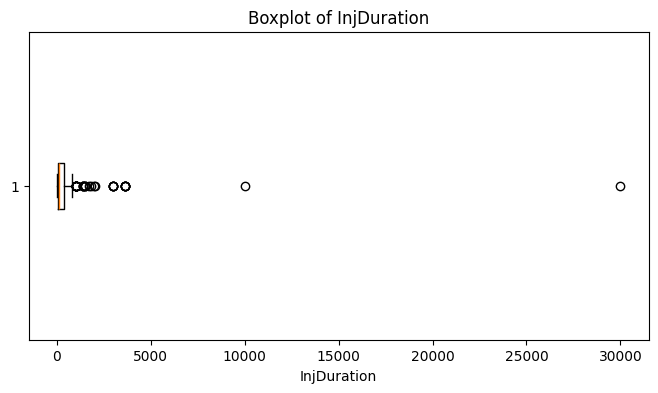

,id,age,injury_code,InjDuration
1741,200371_20141020t135011,33.0,shin_spli,30000.0


New Max InjDuration: 176.0, Min InjDuration: 42.5


In [55]:
# InjDuration of 3000 is suspicious

plt.figure(figsize=(8, 4))
plt.boxplot(cleaned_session_data_full_part2['InjDuration'].dropna(), vert=False)
plt.title('Boxplot of InjDuration')
plt.xlabel('InjDuration')
plt.show()

# For cronic injuries the duration could be the age of the subject.
outlier_mask = cleaned_session_data_full_part2['InjDuration'] > (cleaned_session_data_full_part2['age'] * 365)
display(cleaned_session_data_full_part2[outlier_mask][['id', 'age','injury_code', 'InjDuration']])
cleaned_session_data_full_part2.loc[outlier_mask, 'InjDuration'] = np.nan
print(f"New Max InjDuration: {cleaned_session_data_full_part2['Weight'].max()}, Min InjDuration: {cleaned_session_data_full_part2['Weight'].min()}")

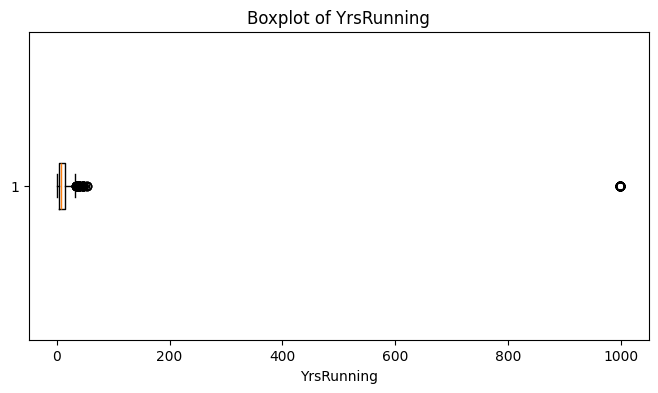

,id,age,YrsRunning
643,100168_20100824t164805,50.0,999.0
656,100181_20101026t163032,43.0,999.0
1141,100232_20090527t000000,22.0,999.0
1142,100242_20090617t131821,54.0,999.0
1145,100244_20090709t124813,23.0,999.0


New Max YrsRunning: 54.0, Min YrsRunning: 42.5


In [56]:
# YearsRunning of 999 is clearly an outlier, replace with Nan.

plt.figure(figsize=(8, 4))
plt.boxplot(cleaned_session_data_full_part2['YrsRunning'].dropna(), vert=False)
plt.title('Boxplot of YrsRunning')
plt.xlabel('YrsRunning')
plt.show()

# For cronic injuries the duration could be the age of the subject.
outlier_mask = cleaned_session_data_full_part2['YrsRunning'] > (cleaned_session_data_full_part2['age'])
display(cleaned_session_data_full_part2[outlier_mask][['id', 'age', 'YrsRunning']].head(5))
cleaned_session_data_full_part2.loc[outlier_mask, 'YrsRunning'] = np.nan
print(f"New Max YrsRunning: {cleaned_session_data_full_part2['YrsRunning'].max()}, Min YrsRunning: {cleaned_session_data_full_part2['Weight'].min()}")

In [57]:
cleaned_session_data_full_part2[['Level']].value_counts(dropna=False)

Level       
recreational    1042
competitive      521
NaN              269
Name: count, dtype: int64

In [58]:
outlier_mask = (cleaned_session_data_full_part2['Gender'] != 'male') & (cleaned_session_data_full_part2['Gender'] != 'female')
cleaned_session_data_full_part2.loc[outlier_mask, 'Gender'] = np.nan
cleaned_session_data_full_part2["Gender"].value_counts(dropna=False)

Gender
female    926
male      905
NaN         1
Name: count, dtype: int64

In [59]:
for col in cleaned_session_data_full_part2.columns:
    print(f"'{col}',")

'id',
'sub_id',
'datestring',
'filename',
'speed_r',
'age',
'Height',
'Weight',
'Gender',
'DominantLeg',
'InjDefn',
'InjJoint',
'InjSide',
'SpecInjury',
'InjDuration',
'InjJoint2',
'InjSide2',
'SpecInjury2',
'Activities',
'Level',
'YrsRunning',
'RaceDistance',
'RaceTimeHrs',
'RaceTimeMins',
'RaceTimeSecs',
'YrPR',
'NumRaces',
'sub_id_orig',
'session_file_path',
'l_step_width',
'l_stride_rate',
'l_stride_length',
'l_swing_time',
'l_stance_time',
'l_pelvis_peak_drop_angle',
'l_pelvis_drop_excursion',
'l_ankle_df_peak_angle',
'l_ankle_eve_peak_angle',
'l_ankle_eve_percent_stance',
'l_ankle_eve_excursion',
'l_ankle_rot_peak_angle',
'l_ankle_rot_excursion',
'l_knee_flex_peak_angle',
'l_knee_add_peak_angle',
'l_knee_add_excursion',
'l_knee_abd_peak_angle',
'l_knee_abd_excursion',
'l_knee_rot_peak_angle',
'l_knee_rot_excursion',
'l_hip_ext_peak_angle',
'l_hip_add_peak_angle',
'l_hip_add_excursion',
'l_hip_rot_peak_angle',
'l_hip_rot_excursion',
'l_foot_prog_angle',
'l_foot_ang_at_hs',
'l_mhw_

In [60]:
from core.constants import RICKD_SESSION_DATA_FULL_CLEANED_FILE
# Keep only the relevant columns
cols_to_drop = [
    'InjDefn',
    'InjJoint',
    'InjSide',
    'SpecInjury',
    'InjDuration',
    'InjJoint2',
    'InjSide2',
    'SpecInjury2',
    'sub_id_orig',
]
cleaned_session_data_full = cleaned_session_data_full_part2.drop(columns=cols_to_drop)
cleaned_session_data_full.to_csv(RICKD_SESSION_DATA_FULL_CLEANED_FILE, index=False)
cleaned_session_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Columns: 113 entries, id to has_no_injury
dtypes: bool(1), datetime64[ns](1), float64(87), int64(5), object(19)
memory usage: 1.6+ MB
